<a href="https://colab.research.google.com/github/tarun170104/BHARATINTERN/blob/main/irisflowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**LOADING DATASET**

In [ ]:
iris_df=pd.read_csv("IRIS.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
species_counts=iris_df['species'].value_counts()

In [ ]:
print("Count of the species column of the dataset : ")
print(species_counts)

Count of the species column of the dataset : 
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
mean_sepal_length=iris_df.groupby('species')['sepal_length'].mean()

In [ ]:
print("Mean of the sepal length of each species : ")
print(mean_sepal_length)

Mean of the sepal length of each species : 
species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64


In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
median_petal_width=iris_df.groupby('species')['petal_width'].median()

In [ ]:
print("Median of the petal width of each species : ")
print(median_petal_width)

Median of the petal width of each species : 
species
Iris-setosa        0.2
Iris-versicolor    1.3
Iris-virginica     2.0
Name: petal_width, dtype: float64


In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
import seaborn as sns

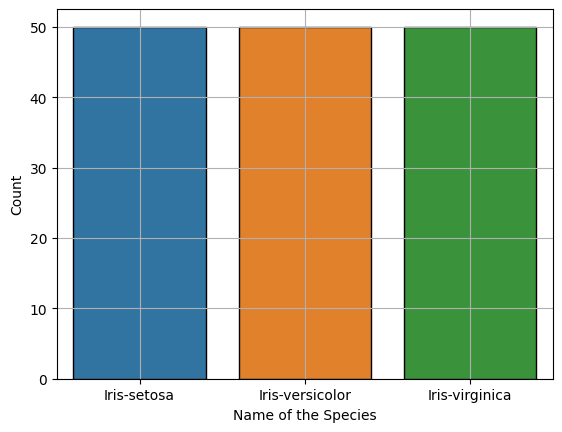

In [ ]:
sns.countplot(data=iris_df,x='species',ec='black')
plt.xlabel("Name of the Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris_df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

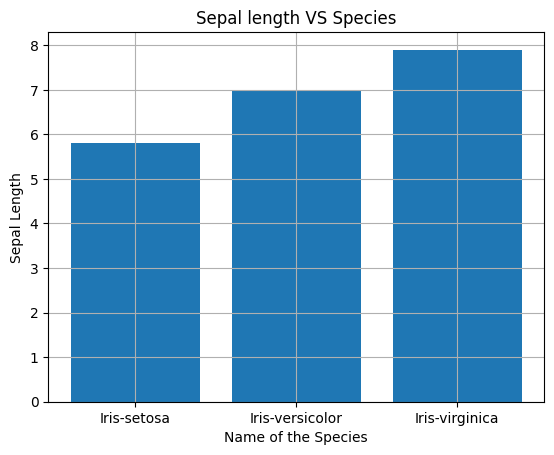

In [ ]:
plt.bar(iris_df['species'],iris_df['sepal_length'])
plt.title("Sepal length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris_df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

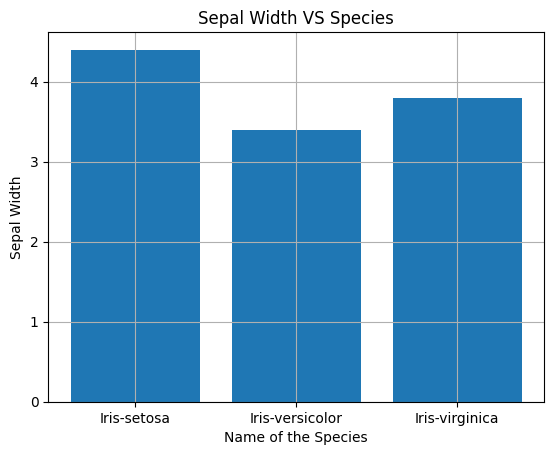

In [ ]:
plt.bar(iris_df['species'],iris_df['sepal_width'])
plt.title("Sepal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [ ]:
iris_df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

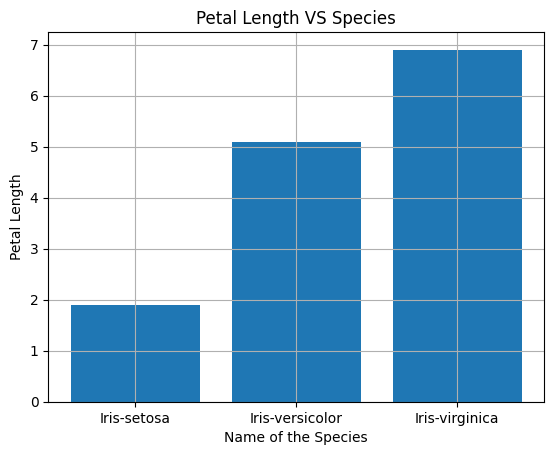

In [ ]:
plt.bar(iris_df['species'],iris_df['petal_length'])
plt.title("Petal Length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [ ]:
iris_df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris_df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

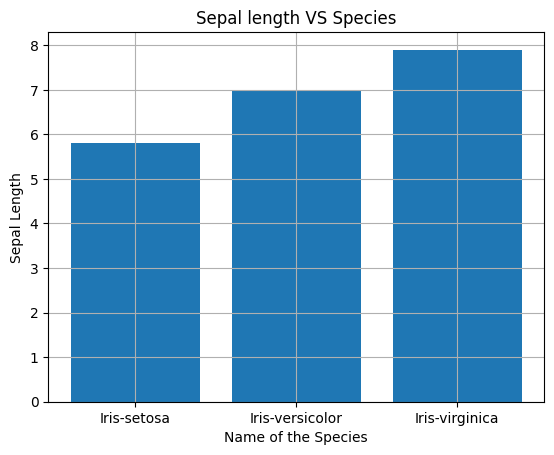

In [ ]:
plt.bar(iris_df['species'],iris_df['sepal_length'])
plt.title("Sepal length VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
iris_df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

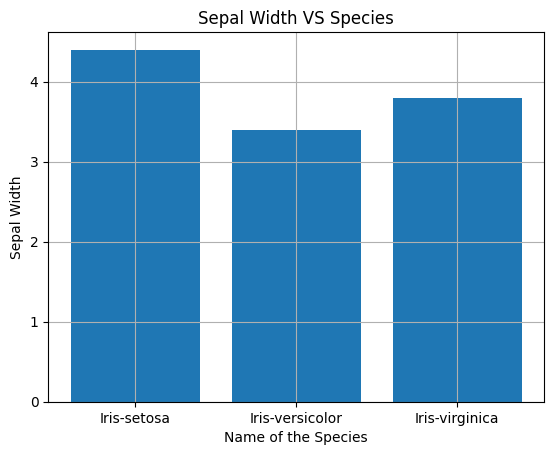

In [ ]:
plt.bar(iris_df['species'],iris_df['sepal_width'])
plt.title("Sepal Width VS Species")
plt.xlabel("Name of the Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
X=iris_df.drop('species',axis=1)

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
Y=iris_df['species']

In [ ]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,random_state=20)

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
85,6.0,3.4,4.5,1.6
1,4.9,3.0,1.4,0.2
51,6.4,3.2,4.5,1.5
130,7.4,2.8,6.1,1.9
55,5.7,2.8,4.5,1.3


In [ ]:
X_train.shape

(114, 4)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0


In [ ]:
X_test.shape

(36, 4)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
Y_train.head()

85     Iris-versicolor
1          Iris-setosa
51     Iris-versicolor
130     Iris-virginica
55     Iris-versicolor
Name: species, dtype: object

In [ ]:
Y_train.shape

(114,)

In [ ]:
type(Y_train)

pandas.core.series.Series

In [ ]:
Y_test.head()

47         Iris-setosa
73     Iris-versicolor
74     Iris-versicolor
129     Iris-virginica
67     Iris-versicolor
Name: species, dtype: object

In [ ]:
Y_test.shape

(36,)

In [ ]:
type(Y_test)

pandas.core.series.Series

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.16782396,  0.69731669,  0.41803027,  0.49149268],
       [-1.16414597, -0.20346634, -1.32614799, -1.315932  ],
       [ 0.65217667,  0.24692517,  0.41803027,  0.36239091],
       [ 1.86305843, -0.65385786,  1.31825131,  0.87879796],
       [-0.19544056, -0.65385786,  0.41803027,  0.10418739],
       [ 0.28891214, -1.10424937,  1.03693224,  0.23328915],
       [-1.16414597,  0.02172942, -1.26988417, -1.44503377],
       [ 1.01544119,  0.02172942,  0.36176646,  0.23328915],
       [ 0.53108849,  0.47212093,  0.5305579 ,  0.49149268],
       [-1.40632232,  0.24692517, -1.3824118 , -1.315932  ],
       [-0.55870509,  1.82329547, -1.15735654, -1.05772848],
       [-1.0430578 ,  0.47212093, -1.32614799, -1.315932  ],
       [-0.19544056, -1.32944513,  0.69934935,  1.00789973],
       [-0.92196962,  1.59809971, -1.04482891, -1.05772848],
       [ 0.65217667, -0.65385786,  1.03693224,  1.26610325],
       [ 0.41000031,  0.69731669,  0.92440461,  1.39520502],
       [-0.55870509,  0.

In [ ]:
X_train.shape

(114, 4)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_test=scaler.fit_transform(X_test)
X_test

array([[-1.44478718,  0.70734698, -1.39251151, -1.31338208],
       [ 0.38234415, -0.37624839,  0.5514411 ,  0.09381301],
       [ 0.74777041, -0.10534955,  0.31581048,  0.23453251],
       [ 1.72224045,  0.16554929,  1.1994253 ,  0.65669104],
       [ 0.01691788, -0.64714724,  0.19799517, -0.18762601],
       [-0.34850838, -1.18894492,  0.13908752,  0.23453251],
       [ 1.23500543,  0.70734698,  1.25833296,  1.6417276 ],
       [-0.8357434 ,  2.0618412 , -1.33360385, -1.03194307],
       [ 1.11319668, -1.18894492,  1.1994253 ,  0.93813006],
       [-1.20116967,  0.16554929, -1.39251151, -1.45410159],
       [ 0.86957917,  0.16554929,  0.84597938,  1.21956908],
       [ 1.23500543, -0.37624839,  0.61034876,  0.37525202],
       [ 0.26053539, -2.00164146,  0.72816407,  0.51597153],
       [-0.95755216,  0.70734698, -1.51032681, -1.31338208],
       [-0.71393465,  1.24914467, -1.39251151, -1.31338208],
       [ 2.33128423, -0.37624839,  1.7295942 ,  1.21956908],
       [-1.81021344,  0.

In [ ]:
X_test.shape

(36, 4)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(114, 4)
(36, 4)
(36,)
(114,)


In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [ ]:
print(X_test.shape)
print(y_pred.shape)

(36, 4)
(36,)


In [ ]:
train_accuracy=model.score(X_train,Y_train)
print("The training accuracy is",train_accuracy)

The training accuracy is 0.9736842105263158


In [ ]:
test_accuracy=model.score(X_test,Y_test)
print("The testing accuracy is",test_accuracy)

The testing accuracy is 0.9444444444444444
